# Hourly evaporation from CoAgMET data
*M. Vremec, University of Graz, 2021*

In this notebook it is shown how to compute hourly potential evaporation from meteorological data observed by the Colorado State University (CoAgMET) at Holyoke in Colorado, USA. The notebook also includes a comparison between evaporation estimated using *pyet* (FAO56) and evaporation available from CoAgMET. Hourly potential evaporation is estimated according to ASCE recommendations (Wright, 2000).

**Note**:
The forumulas are checked/tested against literature values in ASCE. The computed hourly evapotranspiration and meteorological variables fit the literature values from ASC. When comparing to hourly values from CoAgMET, they seem to deviate a little in the night time and at noon (CHECK why).

Source: https://coagmet.colostate.edu/station/selector

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pyet
pyet.show_versions()

Python version: 3.8.11 (default, Aug  6 2021, 09:57:55) [MSC v.1916 64 bit (AMD64)]
Numpy version: 1.20.3
Pandas version: 1.3.2
Matplotlib version: 3.4.2
Pyet version: 1.1.0b


## 1. Load CoAgMET data

In [2]:
meteo = pd.read_csv("data\\hourly.csv", index_col="date_time", parse_dates=True)
meteo.columns

Index(['station_id', 'eto', 'etr', 'rso', 'ea_avg', 'rh_max', 'rh_min',
       'td_avg', 'td_max', 'td_min', 'solarmj', 'airt_avg', 'airt_max',
       'airt_min', 'intt_avg', 'wett_avg', 'windd_sd', 'airt2_avg',
       'battv_min', 'precip_tb', 'timestamp', 'windd_avg', 'winds_avg',
       'winds_max', 'precip_wpg', 'soilt4_avg', 'soilt8_avg', 'solarw_avg',
       'precip_accum', 'soilvwc8_avg', 'wetstate_avg'],
      dtype='object')

In [3]:
lat =  37.8623 * np.pi / 180
LZ = 112.8811
LM = 115
elevation = 1759  #5770 ft.

In [4]:
# estimate hourly E0 for short grass (ASCE-OS)
etos_hour = pyet.pm_asce(meteo["airt_avg"], meteo["winds_avg"], 
                        rs=meteo["solarmj"],
                        ea=meteo["ea_avg"],
                        elevation=elevation, lat=lat, lz=LZ, lon=LM, freq="H",
                        rhmax=meteo["rh_max"], 
                        rhmin=meteo["rh_min"],
                        tmax=meteo["airt_max"], tmin=meteo["airt_min"])
# estimate hourly E0 for tall grass (ASCE-RS)
etrs_hour = pyet.pm_asce(meteo["airt_avg"], meteo["winds_avg"], 
                        rs=meteo["solarmj"],
                        ea=meteo["ea_avg"],
                        elevation=elevation, lat=lat, lz=LZ, lon=LM, freq="H",
                        rhmax=meteo["rh_max"], 
                        rhmin=meteo["rh_min"],
                        tmax=meteo["airt_max"], tmin=meteo["airt_min"],
                        etype="rs")

## 2. Comparison between pyet ASCE-OS vs CoAgMET ASCE

<AxesSubplot:xlabel='date_time'>

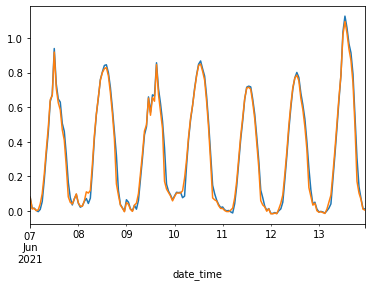

In [5]:
s1,e1 = ("2021-6-7","2021-6-13")
etos_hour[s1:e1].plot()
meteo.loc[s1:e1,"eto"].plot()

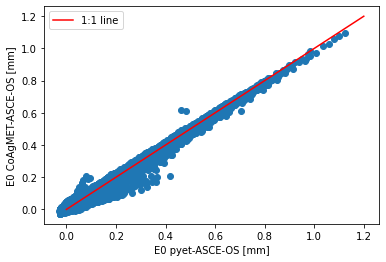

In [6]:
plt.scatter(etos_hour, meteo["eto"])
plt.plot([0,1.2],[0,1.2], color="red", label="1:1 line")
plt.legend()
plt.xlabel("E0 pyet-ASCE-OS [mm]")
plt.ylabel("E0 CoAgMET-ASCE-OS [mm]");

## 3. Check error when resampling to daily

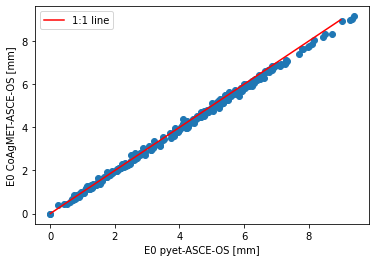

In [9]:
plt.scatter(etos_hour.resample("d").sum(), meteo["eto"].resample("d").sum())
plt.plot([0,9],[0,9], color="red", label="1:1 line")
plt.legend()
plt.xlabel("E0 pyet-ASCE-OS [mm]")
plt.ylabel("E0 CoAgMET-ASCE-OS [mm]");